In [1]:
import sys
sys.path.append("..")

import torch
import networkx as nx
import matplotlib.pyplot as plt
import random

from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
from src.data import load_cora
from src.data import dataset_analysis
from collections import Counter

%load_ext autoreload
%autoreload 2

seed = 12345

# Introduction to the Dataset

The `Cora dataset` is a paper citation network data that consists of 2,708 scientific publications. Nodes in the graph represents scientific publications, and the edges represents if a paper cites another. Taking edge $(u, v)$ as an example, it means paper $u$ cites paper $v$. Furthermore, the node features are `word vectors` with size of $1433$ which use either $0$, absence, or $1$, presence, to reprsent whether the word is presented in the publication. Eventually, the label $y$ is the community or class of the publication, the definition is below:

0. Theory
1. Reinforcement Learning
2. Genetic Algorithms
3. Neural Networks
4. Probabilistic Methods
5. Case Based
6. Rule Learning

# Load Data

In [2]:
graph, num_inputs, num_outputs = load_cora.load()
graph

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

# Label Analysis

In [3]:
print("Labels Distribution:")
n = graph.x.shape[0]
for label, frequency in sorted(Counter(graph.y.tolist()).items()):
    print(f"\t{label}: {frequency}, Propotion: {frequency / n}")

Labels Distribution:
	0: 351, Propotion: 0.129615952732644
	1: 217, Propotion: 0.08013293943870015
	2: 418, Propotion: 0.15435745937961595
	3: 818, Propotion: 0.3020679468242245
	4: 426, Propotion: 0.15731166912850814
	5: 298, Propotion: 0.11004431314623338
	6: 180, Propotion: 0.06646971935007386


As we can see, `the labels are distributed inequally`. Specificially, The largest label is $3$, Neural Networks, which has about $30\%$, and the least is $6$, Rule Learning, which has only $6.6\%$. 

# Graph Analysis

Analyze the dataset in terms of graph. Specifically, analyze the dataset through graph visualization , basic graph statistics, degree distribution, and most important community density analysis.

## Graph Visulization

`Nodes are colored by the classes, target labels y.`

### Global Visulization

Visulize the entire graph.

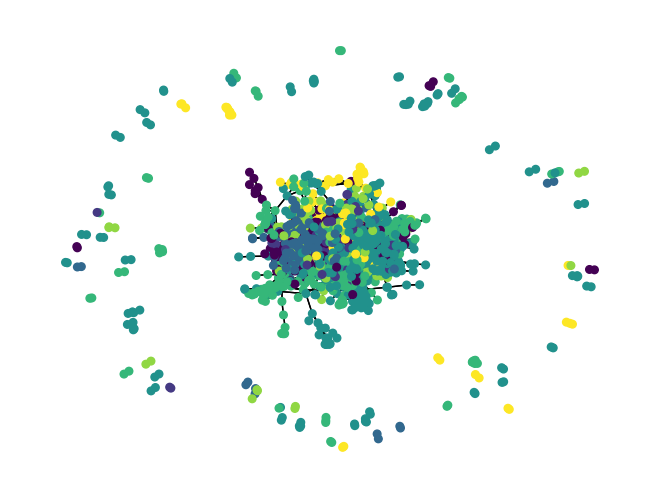

In [4]:
g, y = load_cora.convert_to_networkx(graph)
load_cora.plot_graph(g, y, seed=seed)

### Sub-graph Visulization

Visulize the random sub-graph.

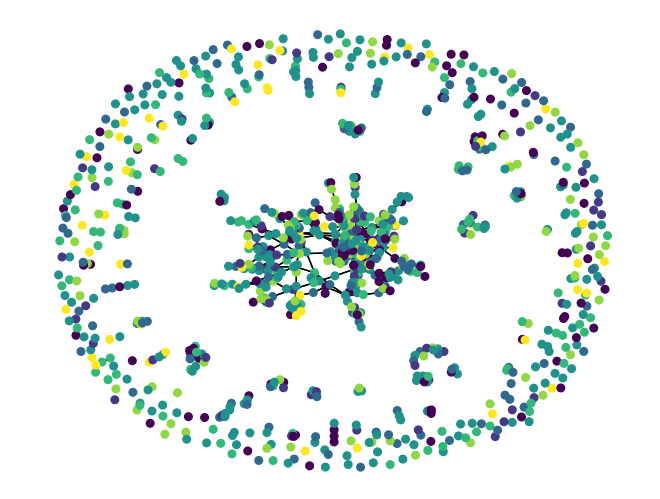

In [5]:
sub_g, sub_y = load_cora.convert_to_networkx(graph, n_sample=1000, seed=seed)
load_cora.plot_graph(sub_g, sub_y, seed=seed)

## Graph Statistics

### Size

In [6]:
print("Number of nodes", g.order())
print("Number of edges", g.size())

Number of nodes 2708
Number of edges 10556


### Degree Distribution

Average Degree: 7.796159527326441
Maximum Degree: 336
Minimum Degree: 2


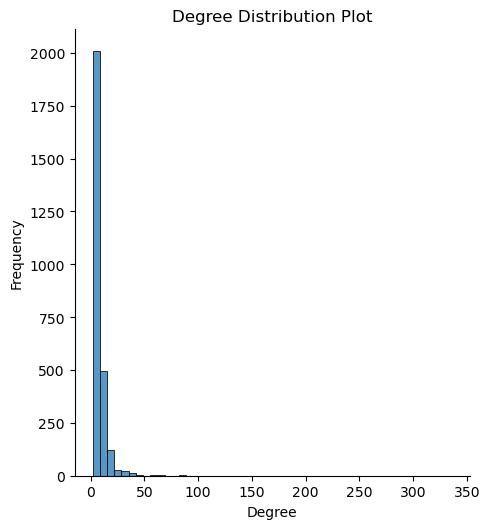

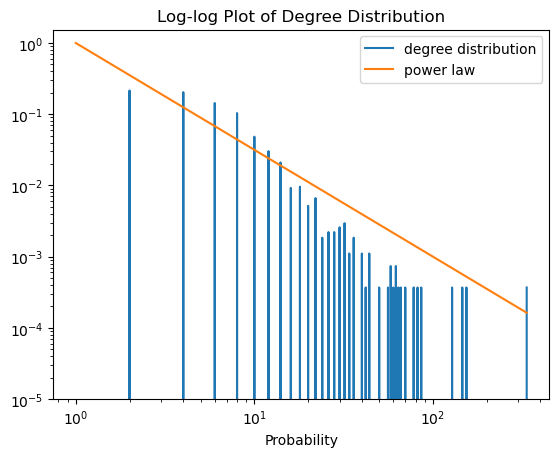

In [7]:
dataset_analysis.degree_statistics(g)

As we can see, the distribution of the degrees seem like a `power-law` distribution like other typical real networks. In other words, there are a few `hubs`, nodes connected to more other nodes, in the graph. To verify that, I also plotted the log-log plot. As a result, we can see the the degree distribution possibly follows the power-law. That says, for the degree of nodes, `the most nodes have low number of degree, while a few nodes have higher degree`.

### Community Analysis

To know whether there are communities, we need to find out the `community density`. If the community structure exist in the graph, we will see the `higher` density within communities than the density connect communities. More specifically, the density is defined by the density of edges. If edges connected two nodes within a same community, this edge is an `in-community edge`. Otherwise, the edge is an `out-community edge`. Therefore, the `in-community density` is defined by $density = \frac{number\_in\_communuty\_edges}{total\_edges}$

In [8]:
# set community, y, to the nodes
community = {}
for i in range(len(y)):
    community[i] = y[i]
    
nx.set_node_attributes(g, values=community, name="y")

In [9]:
dataset_analysis.community_analysis(g, "y")

Average In-Community Density: 0.8099658961727927
Average Out-Community Density: 0.19003410382720728
Average Density Gap: 0.6199317923455854


,in_community_edges,out_community_edges,in_community_density,out_community_density,density_gap
3,4700,976,0.828048,0.171952,0.656096
4,2640,544,0.829146,0.170854,0.658291
0,2136,918,0.699411,0.300589,0.398821
2,3308,344,0.905805,0.094195,0.811610
1,1636,422,0.794947,0.205053,0.589893
5,1668,504,0.767956,0.232044,0.535912
6,1012,304,0.768997,0.231003,0.537994


For the label `y`, we can see that all communities have higher internal density represented by the `positive density gap`. Accordingly, the average density illustrates a large density gap, $ 0.6199$.